# Question 1.
Form groups of 4-5 people.

Alex Szpakiewicz, Leaonard Roussard, Ocean Spiess, Ruben Leon

# Question 2.
Select a dataset on Kaggle that seems interesting for the group. The dataset must contain explanatory variables that can be interpreted.

In [28]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("conorsully1/credit-score")

print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /Users/alexs/.cache/kagglehub/datasets/conorsully1/credit-score/versions/1


['credit_score.csv']

In [29]:
import pandas as pd

df = pd.read_csv(path + '/credit_score.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

# Question 3.
Let's begin with some visualizations.
- Based on your intuition, what are the most important variables for predicting your target variable?
- Create visualizations that take into account the type of variable (categorical, numerical) that shows
the correlation of the features you selected.
- Don't forget to clean your dataset as needed in order to deal with missing values and outliers.

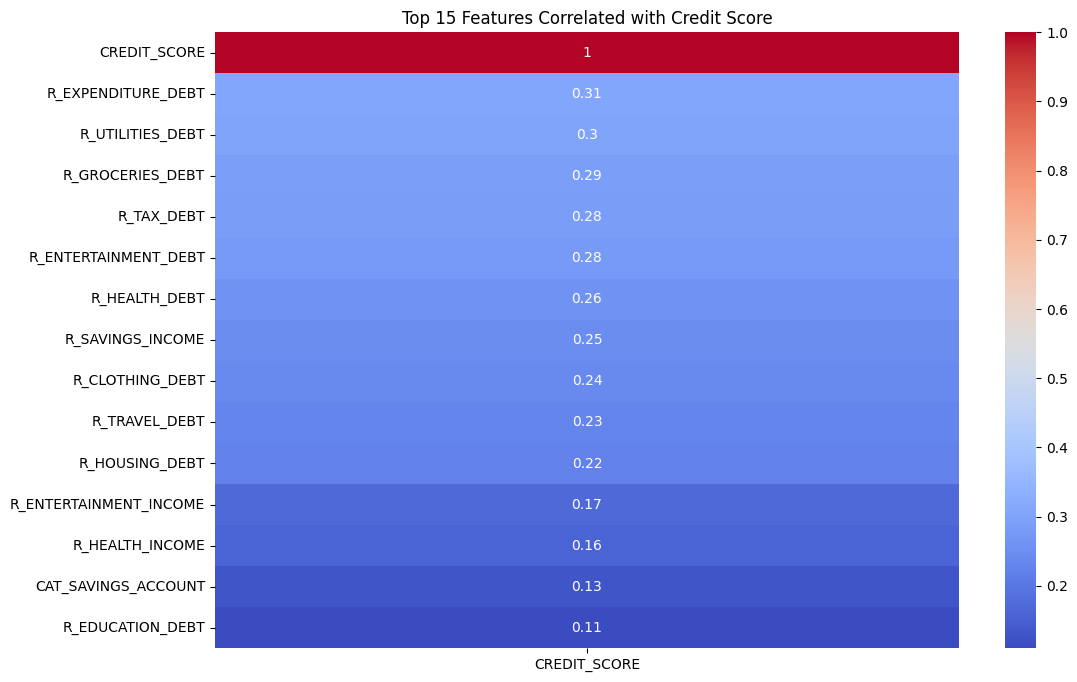

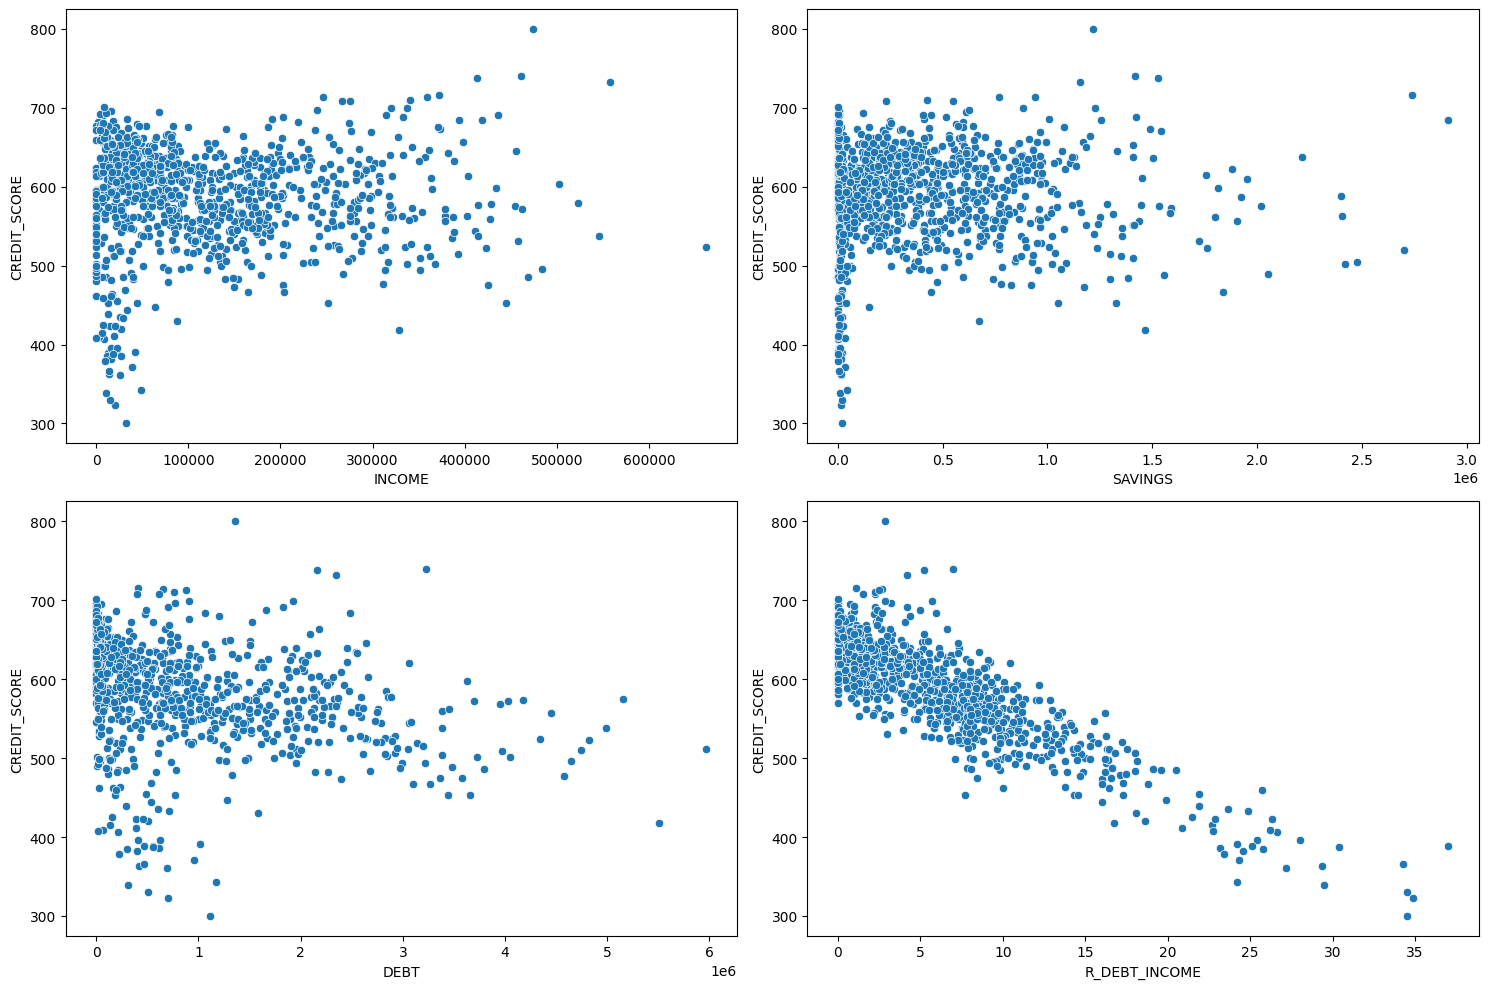

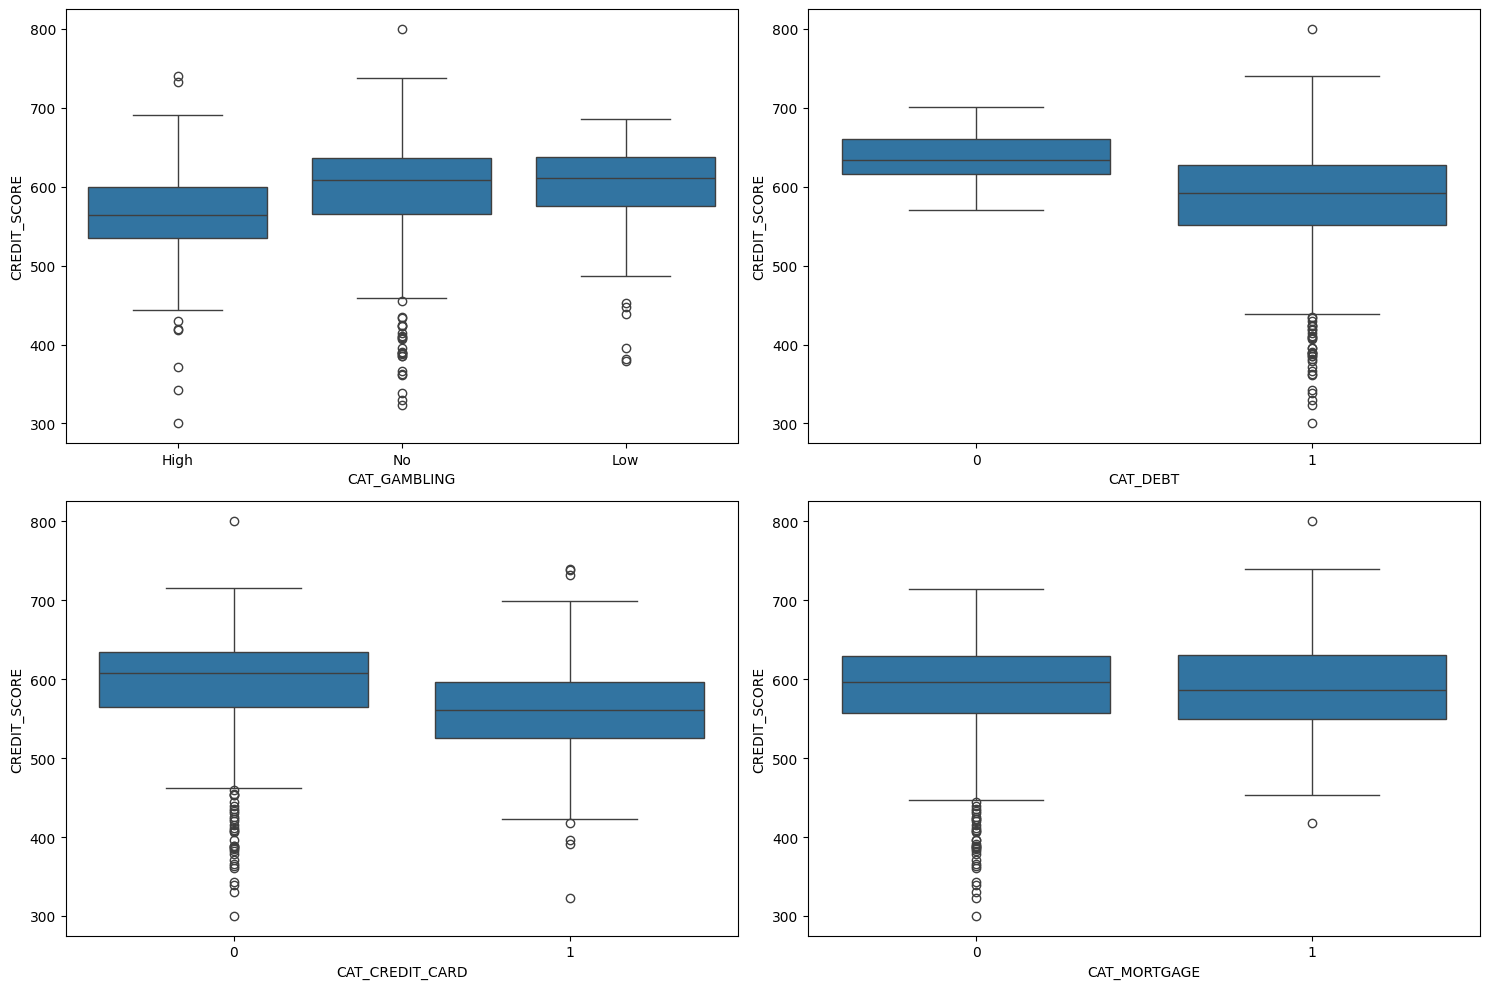

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set target variable
y = df['CREDIT_SCORE']
X = df.drop(['CREDIT_SCORE', 'DEFAULT', 'CUST_ID'], axis=1)


# Create correlation matrix for numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['CREDIT_SCORE']].sort_values(by='CREDIT_SCORE', ascending=False)[:15],
            annot=True, cmap='coolwarm')
plt.title('Top 15 Features Correlated with Credit Score')
plt.show()

# Scatter plots for top numerical features
top_features = ['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y='CREDIT_SCORE', ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

# Box plots for categorical variables
categorical_cols = ['CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='CREDIT_SCORE', ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

# Question 4.
Let us do a linear regression.
- Do the variable transformations that are needed (on hot encoding, log etc...)
- Fit the linear regression
- Interpret the coefficients of your regression
- Does any coefficient contradict your intuition?


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print metrics
print(f'R2 Score: {r2_score(y_test, y_pred):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')

# Get feature names after preprocessing
feature_names = (numerical_cols.tolist() +
                [f"{col}_{val}" for col, vals in
                 zip(categorical_cols, model.named_steps['preprocessor']
                     .named_transformers_['cat'].categories_)
                 for val in vals[1:]])

# Print coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.named_steps['regressor'].coef_
})
print("\nTop 10 most important features:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(10))

R2 Score: 0.781
RMSE: 29.482

Top 10 most important features:
               Feature   Coefficient
72    T_EXPENDITURE_12 -8.335185e+14
73     T_EXPENDITURE_6 -7.510636e+14
60         T_TRAVEL_12  4.246500e+14
61          T_TRAVEL_6  4.164582e+14
36      T_GROCERIES_12  1.844084e+14
48        T_HOUSING_12  1.632835e+14
37       T_GROCERIES_6  1.478722e+14
18  T_ENTERTAINMENT_12  1.226141e+14
19   T_ENTERTAINMENT_6  1.155733e+14
49         T_HOUSING_6  1.105298e+14


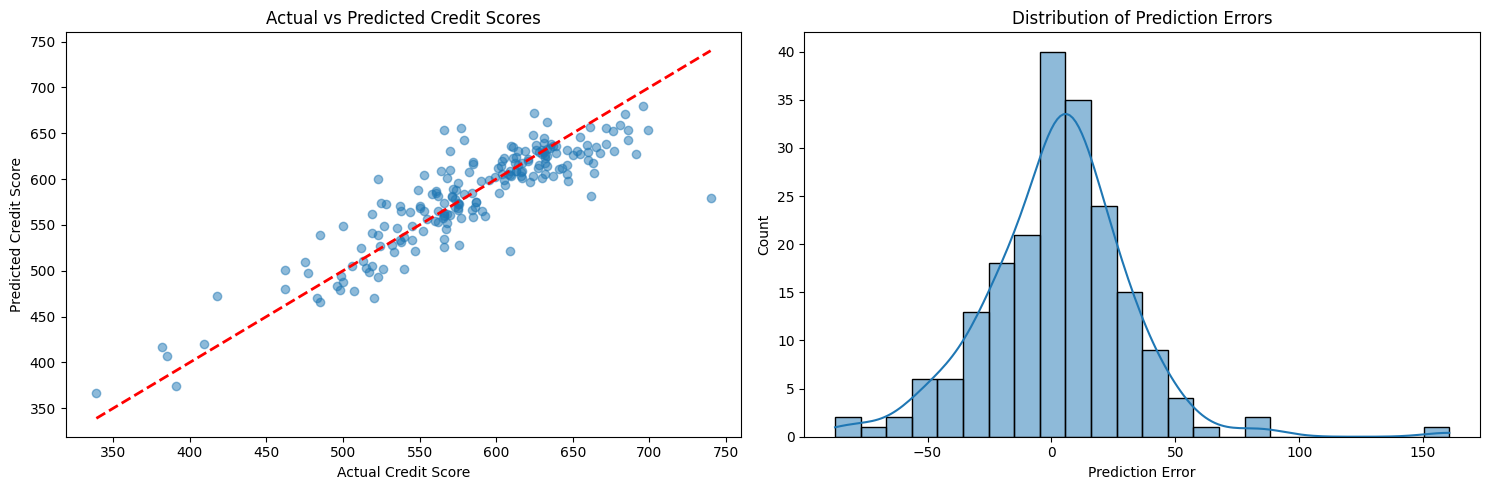


Error Metrics:
Mean Squared Error: 869.19
Root Mean Squared Error: 29.48
Mean Absolute Error: 21.35
R² Score: 0.7810


/Users/alexs/PycharmProjects/ExplainableAI/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')

# Plot 2: Error Distribution
errors = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

# Print error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\nError Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_16949/2031940838.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()


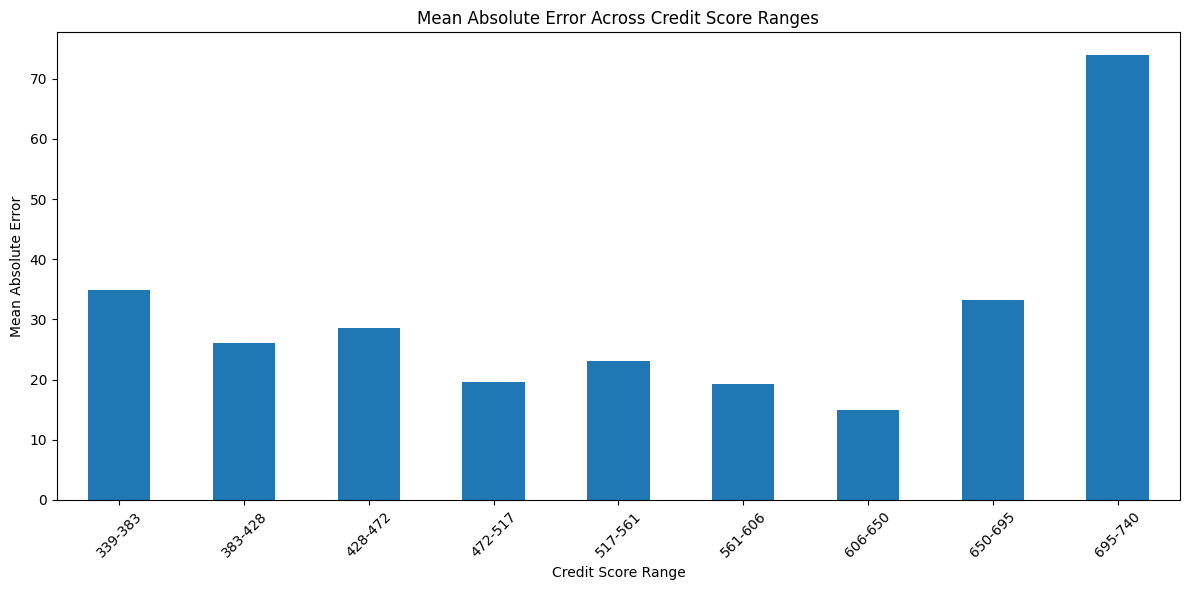


Error Statistics by Credit Score Range:
                     mean    std  count
credit_score_range                     
339-383             34.87    NaN      1
383-428             26.12  19.11      4
428-472             28.51  14.73      2
472-517             19.58  15.22     16
517-561             23.10  17.28     36
561-606             19.25  18.96     58
606-650             14.94  15.62     58
650-695             33.17  18.54     21
695-740             74.00  76.36      3


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_16949/2031940838.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])


In [33]:
# Create credit score bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
y_test_binned = pd.cut(y_test, bins=bins, labels=bin_labels)

# Calculate mean absolute error for each bin
errors_by_bin = pd.DataFrame({
    'credit_score_range': y_test_binned,
    'absolute_error': np.abs(y_test - y_pred)
})
mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
mean_errors.plot(kind='bar')
plt.title('Mean Absolute Error Across Credit Score Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics for each bin
print("\nError Statistics by Credit Score Range:")
error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])
print(error_stats.round(2))

# Question 5.
Let's build a more complex model
- Build the ”best” model you can using traditional data science (no deep learning)
- Don't hesitate to fine tune it, try different combination of variables etc
- What is the best metric you can reach? Can you consider it ”good”
- Given your results what use case can be done with this model?


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create pipeline with Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Random search CV
rf_random = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid,
                             n_iter=20, cv=5, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", rf_random.best_params_)
print("Best cross-validation score:", rf_random.best_score_)

# Make predictions with best model
y_pred_rf = rf_random.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred_rf):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}')

Best parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 4, 'regressor__max_depth': 30}
Best cross-validation score: 0.78593059949224
R2 Score: 0.779
RMSE: 29.637


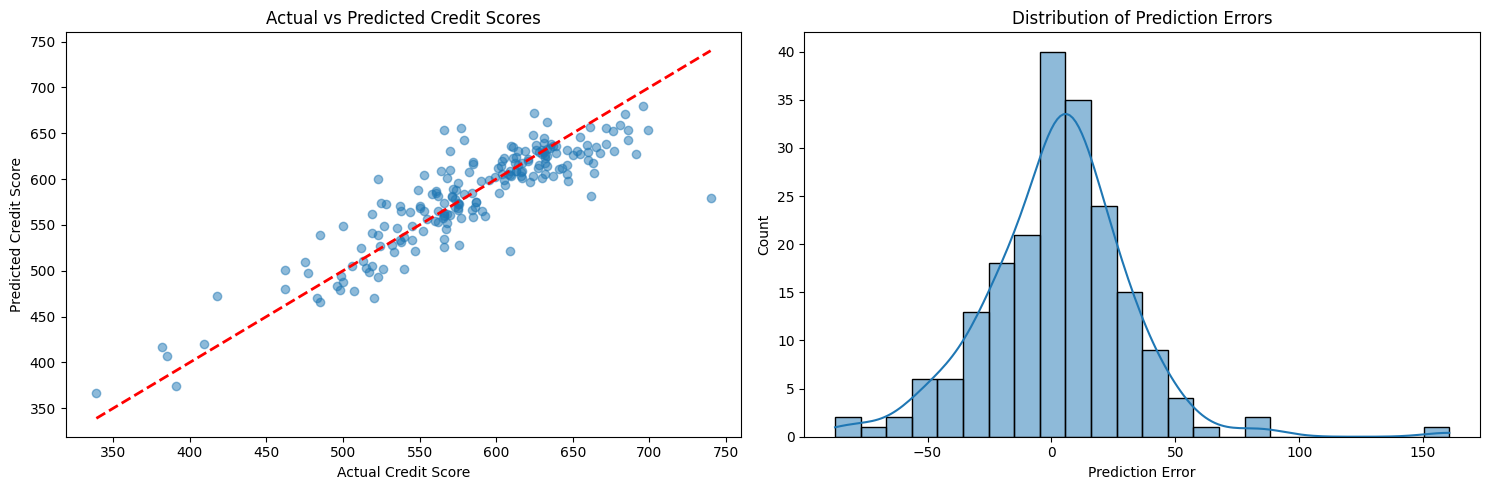


Error Metrics:
Mean Squared Error: 869.19
Root Mean Squared Error: 29.48
Mean Absolute Error: 21.35
R² Score: 0.7810


/Users/alexs/PycharmProjects/ExplainableAI/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')

# Plot 2: Error Distribution
errors = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

# Print error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\nError Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_16949/2031940838.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()


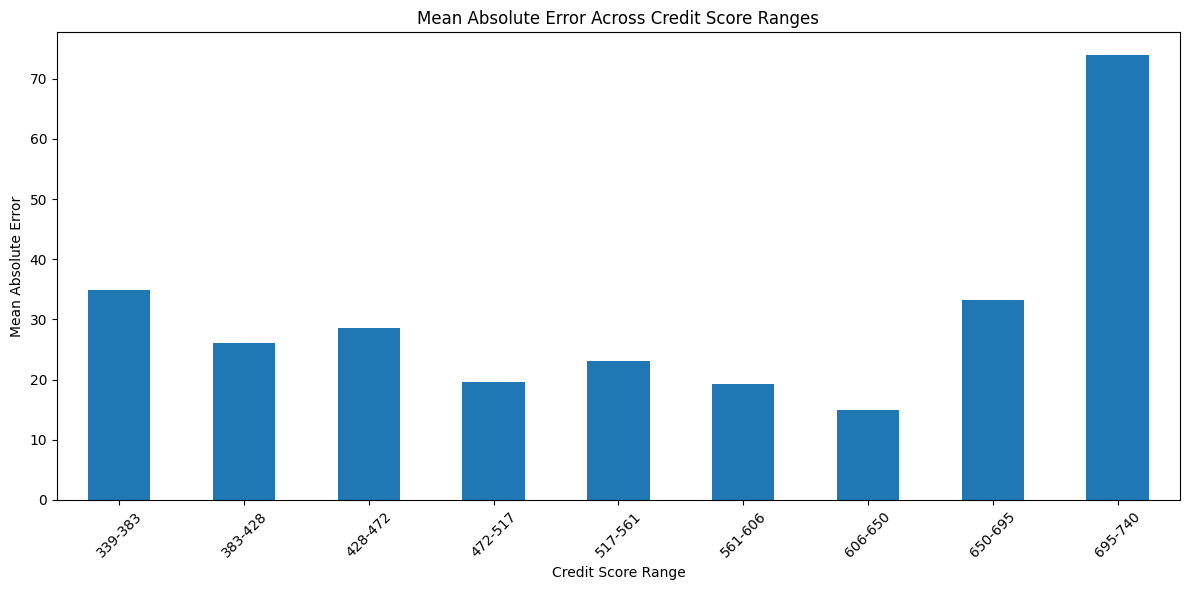


Error Statistics by Credit Score Range:
                     mean    std  count
credit_score_range                     
339-383             34.87    NaN      1
383-428             26.12  19.11      4
428-472             28.51  14.73      2
472-517             19.58  15.22     16
517-561             23.10  17.28     36
561-606             19.25  18.96     58
606-650             14.94  15.62     58
650-695             33.17  18.54     21
695-740             74.00  76.36      3


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_16949/2031940838.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])


In [26]:
# Create credit score bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
y_test_binned = pd.cut(y_test, bins=bins, labels=bin_labels)

# Calculate mean absolute error for each bin
errors_by_bin = pd.DataFrame({
    'credit_score_range': y_test_binned,
    'absolute_error': np.abs(y_test - y_pred)
})
mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
mean_errors.plot(kind='bar')
plt.title('Mean Absolute Error Across Credit Score Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics for each bin
print("\nError Statistics by Credit Score Range:")
error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])
print(error_stats.round(2))

# Question 6.
Using shapley values, explain your model.
- Start by giving some forceplot examples
- Use the feature importance and identify the most important variables
- Compare them to the variables identified in the linear regression
- Using the beeswarm plot explain the model behaviour for the most important variables
- Use dependance plots in order to understand the behaviour of the most important variables

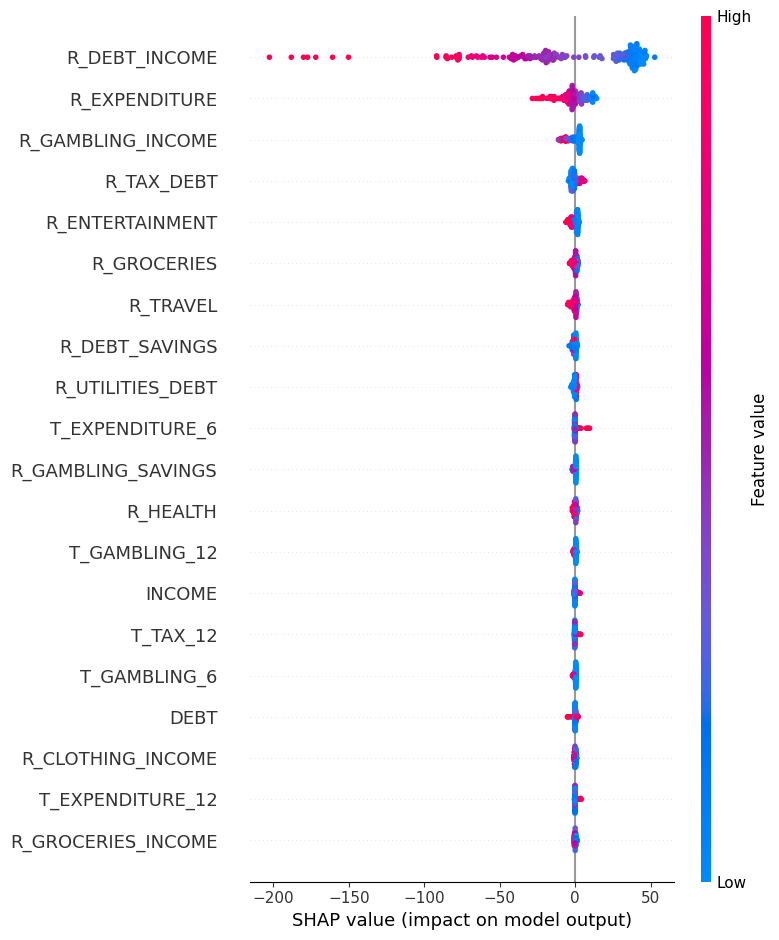

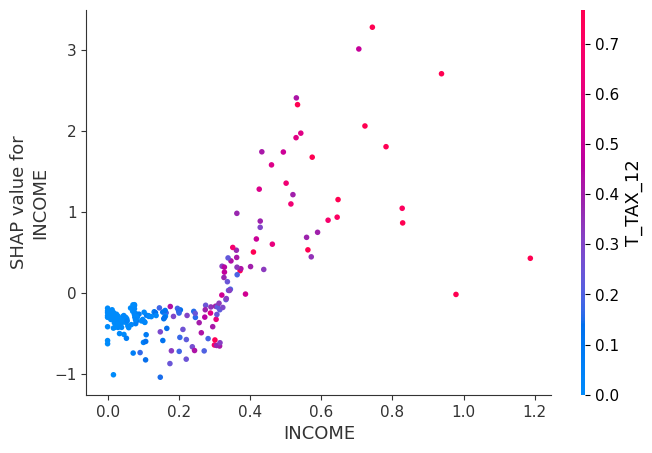

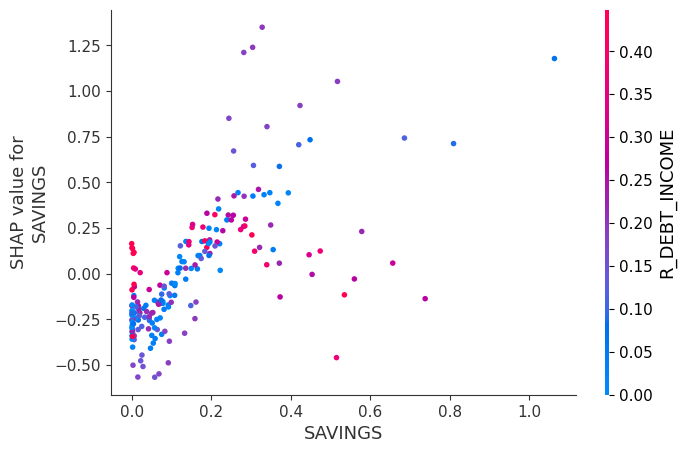

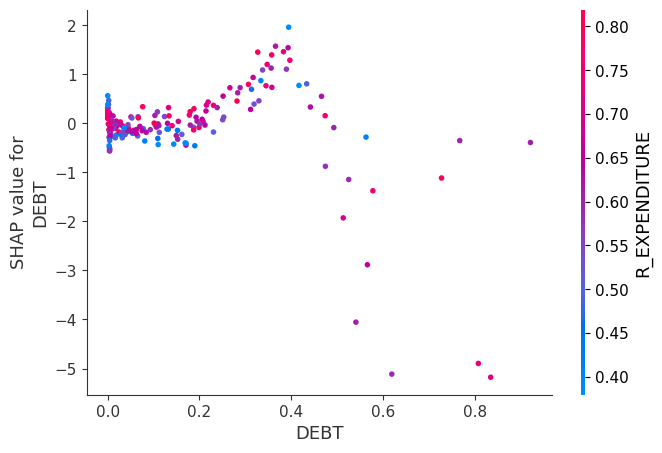

In [23]:
import shap

# Get the best model
best_model = rf_random.best_estimator_

# Create explainer
explainer = shap.TreeExplainer(best_model.named_steps['regressor'])

# Transform the data using the preprocessor
X_processed = best_model.named_steps['preprocessor'].transform(X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_processed)

# Create feature names
feature_names = (numerical_cols.tolist() +
                [f"{col}_{val}" for col, vals in
                 zip(categorical_cols, best_model.named_steps['preprocessor']
                     .named_transformers_['cat'].categories_)
                 for val in vals[1:]])

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_processed, feature_names=feature_names)

# Plot SHAP force plot for first prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_processed[0],
                feature_names=feature_names)

# Plot SHAP dependence plots for top features
for feature in feature_names[:3]:  # Top 3 features
    shap.dependence_plot(feature, shap_values, X_processed,
                        feature_names=feature_names)